Epoch 0: Loss = 2.7934
Epoch 200: Loss = 1.7515
Epoch 400: Loss = 1.7515
Epoch 600: Loss = 1.7515
Epoch 800: Loss = 1.7515


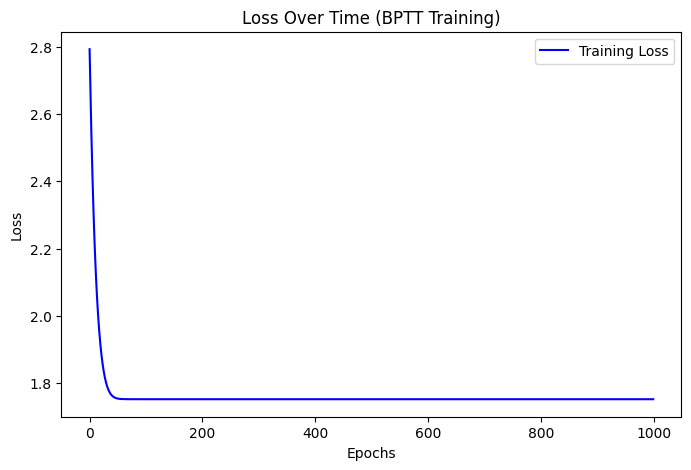

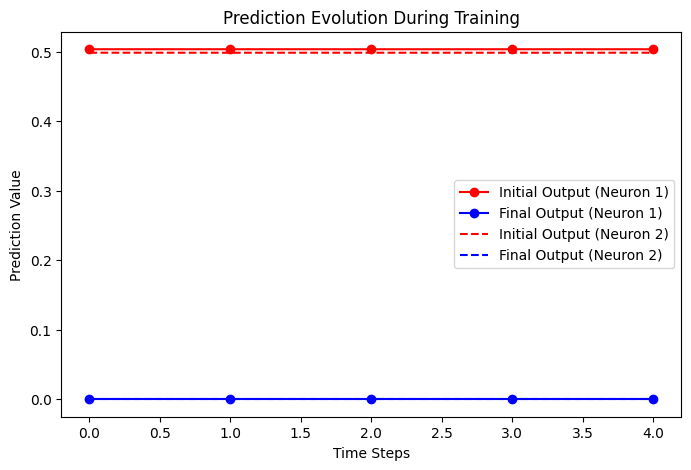

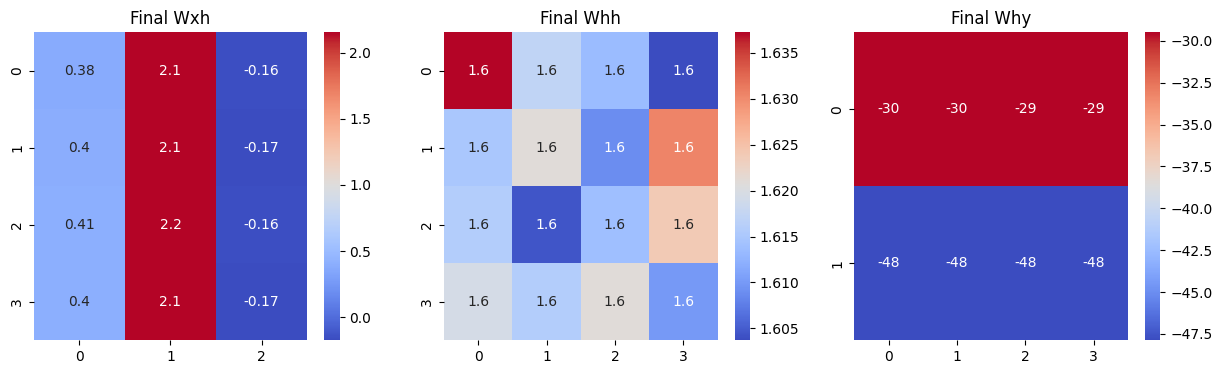

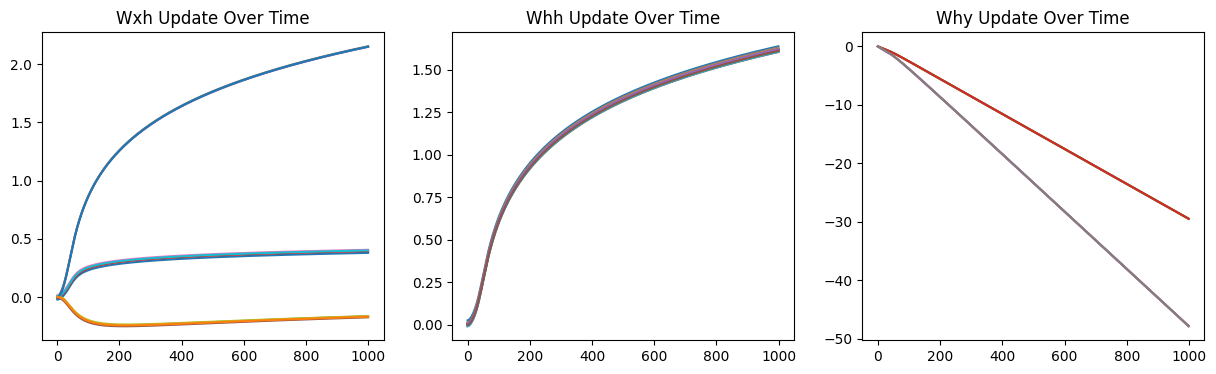

BPTT Training Complete! 🎯


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Parameters
input_size = 3
hidden_size = 4
output_size = 2
time_steps = 5
epochs = 1000
learning_rate = 0.01

# Initialize weights and biases
Wxh = np.random.randn(hidden_size, input_size) * 0.01
Whh = np.random.randn(hidden_size, hidden_size) * 0.01
Why = np.random.randn(output_size, hidden_size) * 0.01
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))

# Track weight updates for visualization
Wxh_history = []
Whh_history = []
Why_history = []

# Forward pass function
def forward_pass(X, h_prev):
    h = {}
    y_pred = {}
    h[-1] = h_prev

    for t in range(time_steps):
        h[t] = sigmoid(np.dot(Wxh, X[t]) + np.dot(Whh, h[t-1]) + bh)
        y_pred[t] = sigmoid(np.dot(Why, h[t]) + by)

    return h, y_pred

# Backpropagation Through Time (BPTT)
def bptt(X, Y, h, y_pred):
    global Wxh, Whh, Why, bh, by

    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)

    dh_next = np.zeros_like(h[0])

    loss = 0
    for t in reversed(range(time_steps)):
        loss += mse_loss(Y[t], y_pred[t])  # Compute loss

        dy = y_pred[t] - Y[t]  # Gradient of loss w.r.t. output
        dWhy += np.dot(dy, h[t].T)
        dby += dy

        dh = np.dot(Why.T, dy) + dh_next
        dh_raw = dh * sigmoid_derivative(h[t])  # Activation derivative

        dbh += dh_raw
        dWxh += np.dot(dh_raw, X[t].T)
        dWhh += np.dot(dh_raw, h[t-1].T)

        dh_next = np.dot(Whh.T, dh_raw)

    # Update weights using gradient descent
    Wxh -= learning_rate * dWxh
    Whh -= learning_rate * dWhh
    Why -= learning_rate * dWhy
    bh -= learning_rate * dbh
    by -= learning_rate * dby

    # Store weight updates for visualization
    Wxh_history.append(Wxh.copy())
    Whh_history.append(Whh.copy())
    Why_history.append(Why.copy())

    return loss / time_steps  # Return average loss

# Example input and output
X = [np.random.randn(input_size, 1) for _ in range(time_steps)]
Y = [np.random.randn(output_size, 1) for _ in range(time_steps)]
h_prev = np.zeros((hidden_size, 1))

# Training
loss_history = []
y_pred_initial = None
y_pred_final = None

for epoch in range(epochs):
    h, y_pred = forward_pass(X, h_prev)
    loss = bptt(X, Y, h, y_pred)
    loss_history.append(loss)

    # Store initial & final predictions
    if epoch == 0:
        y_pred_initial = [y.flatten() for y in y_pred.values()]
    if epoch == epochs - 1:
        y_pred_final = [y.flatten() for y in y_pred.values()]

    # Print progress every 200 epochs
    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Convert weight history to NumPy arrays
Wxh_history = np.array(Wxh_history)
Whh_history = np.array(Whh_history)
Why_history = np.array(Why_history)

# ========== Plot Graphs ==========

# 1️⃣ Loss Over Time
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss", color='b')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Time (BPTT Training)")
plt.legend()
plt.show()

# 2️⃣ Initial vs. Final Predictions
plt.figure(figsize=(8, 5))
plt.plot(range(time_steps), np.array(y_pred_initial)[:, 0], 'ro-', label="Initial Output (Neuron 1)")
plt.plot(range(time_steps), np.array(y_pred_final)[:, 0], 'bo-', label="Final Output (Neuron 1)")
plt.plot(range(time_steps), np.array(y_pred_initial)[:, 1], 'r--', label="Initial Output (Neuron 2)")
plt.plot(range(time_steps), np.array(y_pred_final)[:, 1], 'b--', label="Final Output (Neuron 2)")
plt.xlabel("Time Steps")
plt.ylabel("Prediction Value")
plt.title("Prediction Evolution During Training")
plt.legend()
plt.show()

# 3️⃣ Weight Updates (Heatmaps)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(Wxh_history[-1], cmap="coolwarm", annot=True, ax=axes[0])
axes[0].set_title("Final Wxh")

sns.heatmap(Whh_history[-1], cmap="coolwarm", annot=True, ax=axes[1])
axes[1].set_title("Final Whh")

sns.heatmap(Why_history[-1], cmap="coolwarm", annot=True, ax=axes[2])
axes[2].set_title("Final Why")

plt.show()

# 4️⃣ Weight Change Over Time
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(Wxh_history.reshape(epochs, -1))
axes[0].set_title("Wxh Update Over Time")

axes[1].plot(Whh_history.reshape(epochs, -1))
axes[1].set_title("Whh Update Over Time")

axes[2].plot(Why_history.reshape(epochs, -1))
axes[2].set_title("Why Update Over Time")

plt.show()

<ipython-input-4-7ea2bc59d414>:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add feature dimension


Epoch 0: Loss = 0.07402
Epoch 20: Loss = 0.00003
Epoch 40: Loss = 0.00001
Epoch 60: Loss = 0.00000
Epoch 80: Loss = 0.00000
Epoch 100: Loss = 0.00000
Epoch 120: Loss = 0.00000
Epoch 140: Loss = 0.00001
Epoch 160: Loss = 0.00001
Epoch 180: Loss = 0.00000


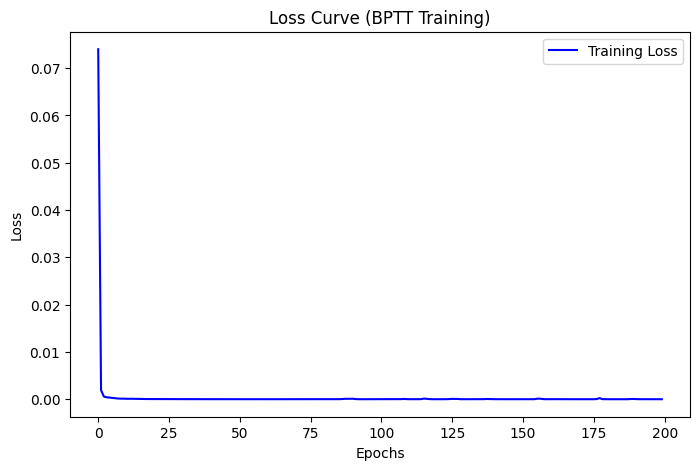

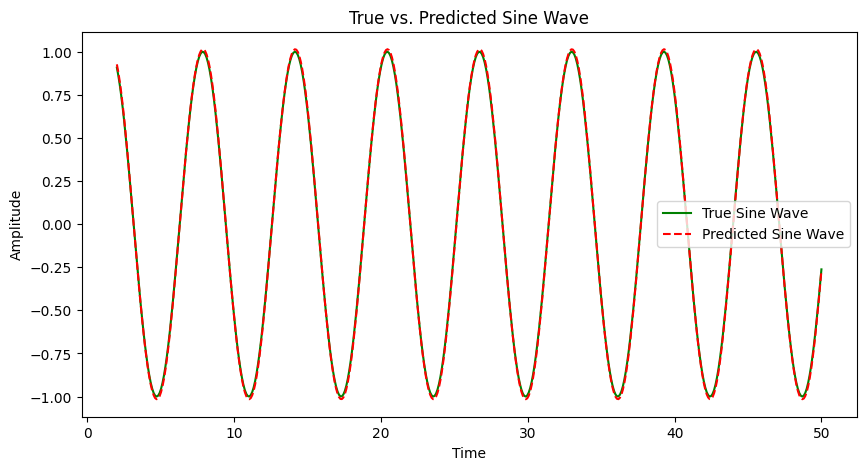

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ====== Generate Sine Wave Data ======
def generate_sine_wave(seq_length, num_samples=1000):
    X = np.linspace(0, 50, num_samples)
    y = np.sin(X)
    return X, y

# Parameters
seq_length = 20   # Time steps for each training sequence
batch_size = 32   # Number of sequences per batch
epochs = 200      # Number of training epochs
hidden_size = 16  # Hidden layer size

# Generate Data
X_data, y_data = generate_sine_wave(seq_length)
X_train = []
y_train = []
for i in range(len(X_data) - seq_length):
    X_train.append(y_data[i:i+seq_length])  # Input sequence
    y_train.append(y_data[i+seq_length])    # Next value (target)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Add feature dimension
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)  # Add feature dimension

# Data Loader
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# ====== Define the RNN Model ======
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=16, output_size=1):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)  # Initial hidden state (batch_size, hidden_dim)
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Take last time step output
        return out

# Initialize Model
model = RNN(hidden_size=hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ====== Training Loop with BPTT ======
loss_history = []

for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()

        # 🔥 Apply Gradient Clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)

        optimizer.step()
        total_loss += loss.item()

    loss_history.append(total_loss / len(train_loader))

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {total_loss / len(train_loader):.5f}")

# ====== Visualization ======

# 🔹 Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss", color="b")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve (BPTT Training)")
plt.legend()
plt.show()

# 🔹 Generate Predictions
X_test, y_test = generate_sine_wave(seq_length, num_samples=500)
X_test_input = []
for i in range(len(X_test) - seq_length):
    X_test_input.append(y_test[i:i+seq_length])

X_test_input = torch.tensor(X_test_input, dtype=torch.float32).unsqueeze(-1)
y_pred_test = model(X_test_input).detach().numpy()

# 🔹 Compare Predictions vs. Ground Truth
plt.figure(figsize=(10, 5))
plt.plot(X_test[seq_length:], y_test[seq_length:], label="True Sine Wave", color="g")
plt.plot(X_test[seq_length:], y_pred_test, label="Predicted Sine Wave", color="r", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("True vs. Predicted Sine Wave")
plt.legend()
plt.show()